In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

import sys
import pickle
import numpy as np
import seaborn as sns
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_process.compute_kld_time import KLDTime

# def compute_kl_distance(p_ini, f):
#     kl_distance = []
#     for i in range(len(p_ini)):
#         if p_ini[i] == 0:
#             kl_distance.append(0)
#         else:
#             kl_distance.append(p_ini[i] * np.log(p_ini[i] / f[i]))

#     return np.sum(kl_distance)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def compute_mean_n(sigma, path):
    successful_exit = np.loadtxt(path + "successful_exit")
    n_array = []
    
    for entry in successful_exit:
        print(str(entry))
        traj_index, exit_index = np.array(entry, int)
        num_gc_success = np.loadtxt(path + "hashed_traj_{0}".format(traj_index))
#         exit_index = np.where(np.sum(num_gc_success[:, 1:], axis = 1) > 199)[0][0]
        n_array.append(num_gc_success[exit_index][1:])

    np_n_array = np.array(n_array)
    mean_n = np.mean(np_n_array, axis=0)/np.sum(np.mean(np_n_array, axis=0))
    
    return mean_n

def compute_n_ave(path):
    successful_exit = np.loadtxt(path + "successful_exit")
    n_sum = []

    for i in range(1, 16):
        n_sum.append(np.sum(np.loadtxt(path + "n{0}".format(i))))

    n_ave = np.array(n_sum)/np.sum(n_sum)
    
    np.savetxt(p) 
    
    return n_ave
    
    

# KLD(t)

In [19]:
path_08 = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_500000/Sigma_0.8/Trial_0/"

In [20]:
kld_sig_08 = KLDTime(path_08)

In [21]:
path_12 = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_500000/Sigma_1.2/Trial_0/"

In [22]:
kld_sig_12 = KLDTime(path_12)

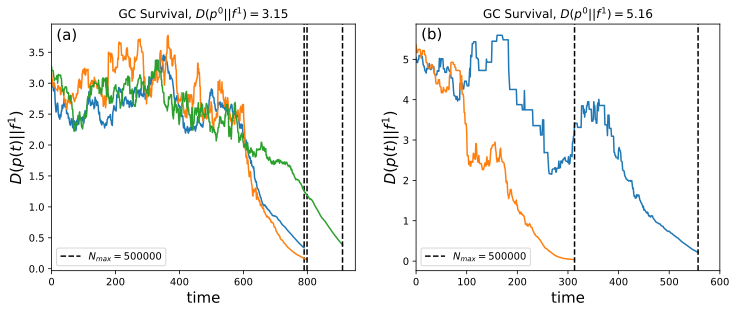

In [30]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
for i in range(3):
    kld_sig_12.plot(i, n_stop=500000)

plt.text(15, 3.7, "(a)", size=15)
plt.xlabel("time", size=15)
plt.ylabel("$D(p(t) || f^{1})$", size=15)
plt.title("GC Survival, $D(p^{0} || f^{1}) = $" + "{:.2f}".format(kld_sig_12.kld_0))
plt.legend()
plt.xlim(0, 950)

plt.subplot(2,2,2)
for i in range(2):
    kld_sig_08.plot(i, n_stop=500000)

plt.text(10, 5.5, "(b)", size=15)
plt.xlabel("time", size=15)
plt.ylabel("$D(p(t) || f^{1})$", size=15)
plt.title("GC Survival, $D(p^{0} || f^{1}) = $" + "{:.2f}".format(kld_sig_08.kld_0))
plt.legend()
plt.xlim(0, 600)

# plt.savefig("Fig_S1_kld_min_adiabatic.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

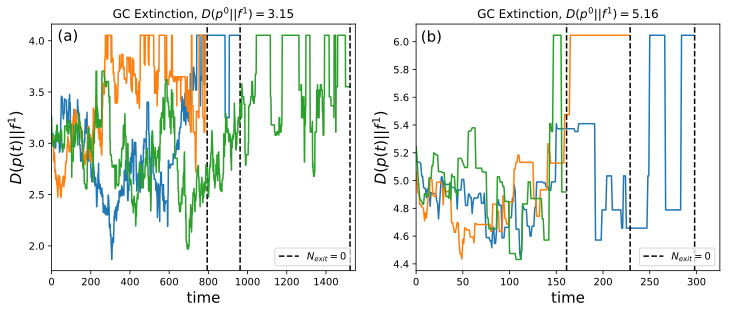

In [29]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
for i in range(3):
    kld_sig_12.plot(i, n_stop=500000, survive=False)

plt.text(30, 4.0, "(a)", size=15)    
plt.xlabel("time", size=15)
plt.ylabel("$D(p(t) || f^{1})$", size=15)
plt.title("GC Extinction, $D(p^{0} || f^{1}) = $" + "{:.2f}".format(kld_sig_12.kld_0))
plt.legend()
plt.xlim(0, 1550)

plt.subplot(2,2,2)
for i in range(3):
    kld_sig_08.plot(i, n_stop=500000, survive=False)

plt.text(5, 6.0, "(b)", size=15)
plt.xlabel("time", size=15)
plt.ylabel("$D(p(t) || f^{1})$", size=15)
plt.title("GC Extinction, $D(p^{0} || f^{1}) = $" + "{:.2f}".format(kld_sig_08.kld_0))
plt.legend(loc=4)
plt.xlim(0, 325)

plt.savefig("Fig_S2_extinction.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

In [5]:
kld_sig_08.compute_p(0, n_stop=500000)

(array([[0.48      , 0.        , 0.02      , ..., 0.        , 0.04      ,
         0.46      ],
        [0.47058824, 0.        , 0.01960784, ..., 0.01960784, 0.03921569,
         0.45098039],
        [0.48076923, 0.        , 0.01923077, ..., 0.01923077, 0.03846154,
         0.44230769],
        ...,
        [0.00007613, 0.00026278, 0.0011297 , ..., 0.01482113, 0.00448932,
         0.00180997],
        [0.00007972, 0.00028123, 0.00117586, ..., 0.01481012, 0.00432922,
         0.00178262],
        [0.000076  , 0.000288  , 0.001234  , ..., 0.014624  , 0.004322  ,
         0.001718  ]]), 557, 500000)

In [7]:
kld_sig_08.compute_p(0, n_stop=500000, survive=False)

(array([[0.48      , 0.02      , 0.        , ..., 0.        , 0.02      ,
         0.48      ],
        [0.5       , 0.02083333, 0.        , ..., 0.        , 0.02083333,
         0.45833333],
        [0.5       , 0.02083333, 0.        , ..., 0.        , 0.02083333,
         0.45833333],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ]]), 298, 0)

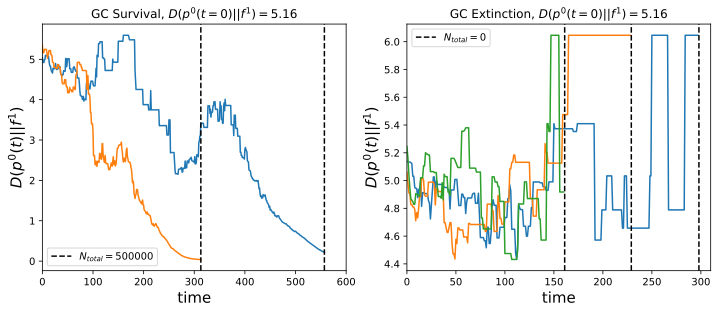

In [5]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
for i in range(2):
    kld_sig_08.plot(i, n_stop=500000)

plt.xlabel("time", size=15)
plt.ylabel("$D(p^{0}(t) || f^{1})$", size=15)
plt.title("GC Survival, $D(p^{0}(t = 0) || f^{1}) = $" + "{:.2f}".format(kld_sig_08.kld_0))
plt.legend()
plt.xlim(0, 600)

plt.subplot(2,2,2)
for i in range(3):
    kld_sig_08.plot(i, n_stop=500000, survive=False)
plt.xlabel("time", size=15)
plt.ylabel("$D(p^{0}(t) || f^{1})$", size=15)
plt.title("GC Extinction, $D(p^{0}(t = 0) || f^{1}) = $" + "{:.2f}".format(kld_sig_08.kld_0))
plt.legend()
plt.xlim(0, 310)

plt.savefig("Fig_S1_KLD_high_vs_time.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)

# plt.title("$N_{stop} = 200$")

In [27]:
# for i in range(3):
#     kld_sig_08.plot(i, n_stop=500000, survive=False)
# plt.xlabel("time", size=15)
# plt.ylabel("$D(p^{0}(t) || f^{1})$", size=15)
# plt.title("GC Extinction, $D(p^{0}(t = 0) || f^{1}) = $" + "{:.2f}".format(kld_sig_08.kld_0))
# plt.legend()
# plt.xlim(0, 310)


In [22]:
np.log(1/kld_sig_08.fitness[0])

6.04613194845029

In [1]:
path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_500000/Sigma_1.2/Trial_0/"

In [2]:
kld_sig_12 = KLDTime(path)

NameError: name 'KLDTime' is not defined

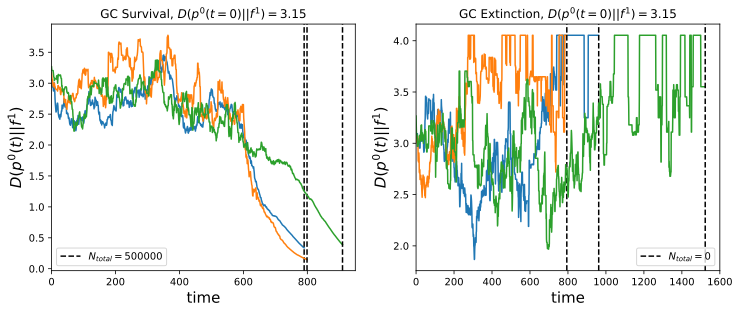

In [35]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)

for i in range(3):
    kld_sig_12.plot(i, n_stop=500000)

plt.xlabel("time", size=15)
plt.ylabel("$D(p^{0}(t) || f^{1})$", size=15)
plt.title("GC Survival, $D(p^{0}(t = 0) || f^{1}) = $" + "{:.2f}".format(kld_sig_12.kld_0))
plt.legend()
plt.xlim(0, 950)

plt.subplot(2,2,2)
for i in range(3):
    kld_sig_12.plot(i, n_stop=500000, survive=False)

plt.xlabel("time", size=15)
plt.ylabel("$D(p^{0}(t) || f^{1})$", size=15)
plt.title("GC Extinction, $D(p^{0}(t = 0) || f^{1}) = $" + "{:.2f}".format(kld_sig_12.kld_0))
plt.legend()
plt.xlim(0, 1600)

plt.savefig("Fig_S2_KLD_optimal_vs_time.pdf", format='pdf', bbox_inches = 'tight', pad_inches = 0)


In [32]:
# for i in range(3):
#     kld_sig_12.plot(i, n_stop=500000, survive=False)

# plt.xlabel("time", size=15)
# plt.ylabel("$D(p^{0}(t) || f^{1})$", size=15)
# plt.title("GC Extinction, $D(p^{0}(t = 0) || f^{1}) = $" + "{:.2f}".format(kld_sig_12.kld_0))
# plt.legend()
# plt.xlim(0, 1600)

In [33]:
np.log(1/ kld_sig_12.fitness[0])

4.053010698729124

Text(0.5,1,'GC Extinction, $\\sigma = $1.2')

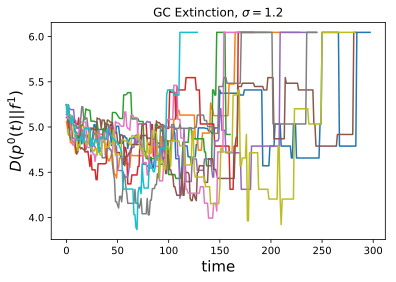

In [27]:
for i in range(10):
    kld_time = kld_sig_08.compute_kld_time(i, n_stop=500000, survive=False)

    plt.plot(range(len(kld_time)), kld_time)

plt.xlabel("time", size=15)
plt.ylabel("$D(p^{0}(t) || f^{1})$", size=15)
plt.title("GC Extinction, $\\sigma = $" + "{0}".format(kld_sig_08.sigma))


In [165]:
# def compute_kld_time(i, n_stop, path, sigma):
#     successful_exit = np.loadtxt(path + "successful_exit")
#     traj_index, exit_index = np.array(successful_exit[i], int)
#     num_gc_success = np.loadtxt(path + "hashed_traj_{0}".format(traj_index))
#     exit_index = np.where(np.sum(num_gc_success[:, 1:], axis = 1) >= n_stop)[0][0]
#     p_gc_success = num_gc_success[:, 1:][:exit_index+1]/np.sum(num_gc_success[:exit_index+1, 1:], axis = 1)[:, np.newaxis]

#     i_optimal = Injection(sigma=sigma, num_odes=p_gc_success.shape[1]+1)

#     kld_time = []

#     for i in range(len(p_gc_success)):
#         kld = compute_kl_distance(p_gc_success[i], i_optimal.f)
#         kld_time.append(kld)
    
#     return kld_time

    

In [171]:
# def compute_kld_time_exti(i, path, sigma):
#     unsuccessful_exit = np.loadtxt(path + "unsuccessful_exit")
#     traj_index, exit_index = np.array(unsuccessful_exit[i], int)
#     num_gc_success = np.loadtxt(path + "hashed_traj_{0}".format(traj_index))
#     exit_index = np.where(np.sum(num_gc_success[:, 1:], axis = 1) == 0)[0][0]
#     p_gc_success = num_gc_success[:, 1:][:exit_index+1]/np.sum(num_gc_success[:exit_index+1, 1:], axis = 1)[:, np.newaxis]

#     i_optimal = Injection(sigma=sigma, num_odes=p_gc_success.shape[1]+1)

#     kld_time = []

#     for i in range(len(p_gc_success)):
#         kld = compute_kl_distance(p_gc_success[i], i_optimal.f)
#         kld_time.append(kld)
    
#     return kld_time


Text(0.5,1,'$N_{stop} = 10000$')

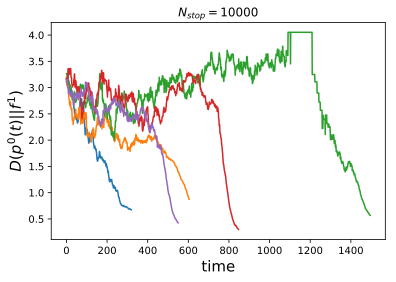

In [123]:
path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_10000/Sigma_1.2/"

for i in range(0, 5):
    kld_time = compute_kld_time(i, n_stop=10000, path=path)

    plt.plot(range(len(kld_time)), kld_time)

plt.xlabel("time", size=15)
plt.ylabel("$D(p^{0}(t) || f^{1})$", size=15)
plt.title("$N_{stop} = 10000$")

In [94]:
successful_exit = np.loadtxt(path + "successful_exit")

In [95]:
traj_index, exit_index = np.array(successful_exit[0], int)

In [96]:
traj_index

1

In [97]:
exit_index

319

In [134]:
n_stop = 1000

In [135]:
num_gc_success = np.loadtxt(path + "hashed_traj_{0}".format(traj_index))
exit_index = np.where(np.sum(num_gc_success[:, 1:], axis = 1) >= n_stop)[0][0]

In [136]:
exit_index

269

In [137]:
np.sum(num_gc_success[exit_index][1:])

1009.0

In [138]:
num_gc_success[exit_index][1:]

array([ 64.,  50.,  47.,  19.,   5.,   0.,   0.,   2.,  44., 113., 177.,
       135., 124., 106., 123.])

In [139]:
p_gc_success = num_gc_success[:, 1:][:exit_index+1]/np.sum(num_gc_success[:exit_index+1, 1:], axis = 1)[:, np.newaxis]

In [140]:
p_gc_success[269]

array([0.06342914, 0.04955401, 0.04658077, 0.01883053, 0.0049554 ,
       0.        , 0.        , 0.00198216, 0.04360753, 0.11199207,
       0.17542121, 0.13379584, 0.12289395, 0.10505451, 0.12190287])

In [141]:
i_optimal = Injection(sigma=1.2, num_odes=p_gc_success.shape[1]+1)

In [143]:
kld = compute_kl_distance(p_gc_success[269], i_optimal.f)

In [144]:
kld

0.7796855572613558

In [147]:
kld_time = compute_kld_time(0, n_stop=1000, path=path)

In [148]:
kld_time[-1]

0.7796855572613558

Text(0.5,1,'$N_{stop} = 50000$')

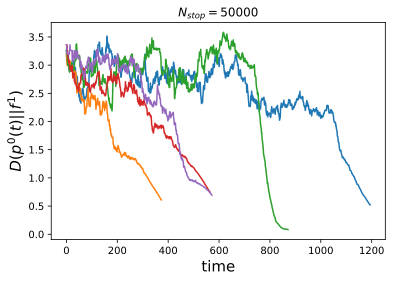

In [33]:
path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_50000/Sigma_1.2/"

for i in range(0, 5):
    kld_time = compute_kld_time(i, n_stop=50000, path=path)

    plt.plot(range(len(kld_time)), kld_time)

plt.xlabel("time", size=15)
plt.ylabel("$D(p^{0}(t) || f^{1})$", size=15)
plt.title("$N_{stop} = 50000$")

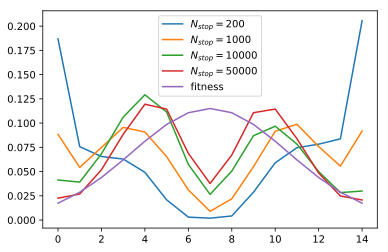

In [10]:
abs_path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/"

relative_path = "Sigma_1.2/Trial_0/"
n_ave = np.loadtxt(abs_path + relative_path + "n_ave")
plt.plot(range(len(n_ave)), n_ave/np.sum(n_ave), label="$N_{stop} = 200$")

relative_path = "steady_state_1000/Sigma_1.2/"
n_ave = np.loadtxt(abs_path + relative_path + "n_ave")
plt.plot(range(len(n_ave)), n_ave/np.sum(n_ave), label="$N_{stop} = 1000$")

relative_path = "steady_state_10000/Sigma_1.2/"
n_ave = np.loadtxt(abs_path + relative_path + "n_ave")
plt.plot(range(len(n_ave)), n_ave/np.sum(n_ave), label="$N_{stop} = 10000$")

relative_path = "steady_state_50000/Sigma_1.2/"
n_ave = np.loadtxt(abs_path + relative_path + "n_ave")
plt.plot(range(len(n_ave)), n_ave/np.sum(n_ave), label="$N_{stop} = 50000$")

# n_ave_pre_computed = np.loadtxt(abs_path + relative_path + "n_ave")
# plt.plot(range(len(n_ave_pre_computed)), n_ave_pre_computed, label="N_ave precomputed")

i_optimal = Injection(sigma=1.2, num_odes=16)
plt.plot(range(len(i_optimal.f)), i_optimal.f, label="fitness")

plt.legend()

In [22]:
17574.0/500000

0.035148

In [17]:
i_optimal.f

array([0.00236676, 0.0073155 , 0.01900794, 0.04151715, 0.07622926,
       0.11765695, 0.15265643, 0.16650002, 0.15265643, 0.11765695,
       0.07622926, 0.04151715, 0.01900794, 0.0073155 , 0.00236676])

In [10]:
def compute_n_ave(path):
    successful_exit = np.loadtxt(path + "successful_exit")
    n_sum = []

    for i in range(1, 16):
        n_sum.append(np.sum(np.loadtxt(path + "n{0}".format(i))))

    n_ave = np.array(n_sum)/np.sum(n_sum)
    
    return n_ave

def compute_n_mean(path):
    n_ave = []
    for i in range(10):
        relative_path = "Sigma_0.8/Trial_{0}/".format(i)
        n_ave_trial = compute_n_ave(abs_path + relative_path)
        n_ave.append(n_ave_trial)

    n_mean = np.mean(n_ave, axis=0)
    
    return n_mean


In [13]:
n_ave = []
abs_path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_500000/"
for i in range(7):
    relative_path = "Sigma_0.8/Trial_{0}/".format(i)
    n_ave_trial = compute_n_ave(abs_path + relative_path)
    n_ave.append(n_ave_trial)
n_mean = np.mean(n_ave, axis=0)

In [14]:
n_mean

array([0.0008113 , 0.00201738, 0.0070251 , 0.02323997, 0.06664974,
       0.1426189 , 0.17755867, 0.14724989, 0.18203028, 0.14743142,
       0.06907782, 0.02409145, 0.00727686, 0.00208895, 0.00083226])

In [15]:
i_optimal = Injection(sigma=0.8, num_odes=16)

In [16]:
i_optimal.f

array([0.00236676, 0.0073155 , 0.01900794, 0.04151715, 0.07622926,
       0.11765695, 0.15265643, 0.16650002, 0.15265643, 0.11765695,
       0.07622926, 0.04151715, 0.01900794, 0.0073155 , 0.00236676])

In [17]:
compute_kl_distance(n_mean/np.sum(n_mean), i_optimal.f)

0.03818609347750511

In [49]:
abs_path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_50000/"
n_mean = compute_n_mean(abs_path + "Sigma_0.8/Trial_0/")

In [50]:
n_mean

array([  2.9862,   6.2359,  19.7158,  59.5747, 157.1951, 306.8006,
       345.0848, 258.6305, 361.4084, 324.3644, 165.5836,  62.3795,
        20.5208,   6.4796,   3.0401])

In [47]:
compute_kl_distance(n_mean/np.sum(n_mean), i_optimal.f)

0.029918263630329713

In [48]:
abs_path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_500000/"

n_ave = np.loadtxt(abs_path + "")

500000.0

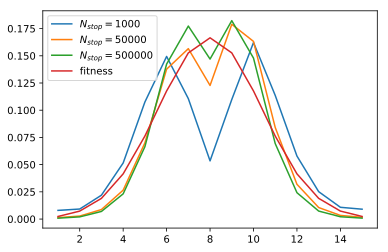

In [62]:
abs_path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_1000/"
n_mean = compute_n_mean(abs_path)
plt.plot(range(1, len(n_mean)+1), n_mean/np.sum(n_mean), label="$N_{stop} = 1000$")

abs_path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_50000/"
n_mean = compute_n_mean(abs_path)
plt.plot(range(1, len(n_mean)+1), n_mean/np.sum(n_mean), label="$N_{stop} = 50000$")

abs_path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_500000/"
n_mean = compute_n_mean(abs_path)
plt.plot(range(1, len(n_mean)+1), n_mean/np.sum(n_mean), label="$N_{stop} = 500000$")


i_optimal = Injection(sigma=0.8, num_odes=16)
plt.plot(range(1, len(i_optimal.f) +1), i_optimal.f, label="fitness")
plt.legend()

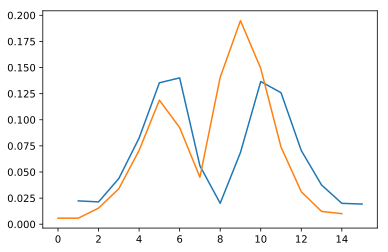

In [39]:
abs_path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/"

n_ave = []
for i in range(30):
    relative_path = "Sigma_0.8/Trial_{0}/".format(i)
    n_ave.append(np.loadtxt(abs_path + relative_path + "n_ave"))

n_mean = np.mean(n_ave, axis=0)
plt.plot(range(1, len(n_mean)+1), n_mean/np.sum(n_mean), label="$N_{stop} = 200$")

relative_path = "steady_state_1000/Sigma_0.8/"
n_ave = np.loadtxt(abs_path + relative_path + "n_ave")
plt.plot(range(len(n_ave)), n_ave/np.sum(n_ave), label="$N_{stop} = 1000$")


In [37]:
i_optimal = Injection(sigma=0.8, num_odes=16)

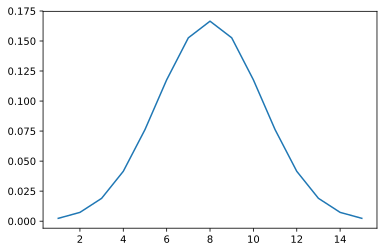

In [38]:
plt.plot(range(1, len(i_optimal.f) +1), i_optimal.f)

In [32]:
np.mean(n_ave, axis=0)

array([0.14      , 0.134     , 0.27433333, 0.517     , 0.84833333,
       0.878     , 0.35033333, 0.12566667, 0.43033333, 0.856     ,
       0.789     , 0.442     , 0.23533333, 0.12533333, 0.121     ])

In [6]:
i_optimal = Injection(sigma=1.2, num_odes=16)

In [22]:
i_optimal.f

array([0.0173701 , 0.02868269, 0.04384569, 0.0620474 , 0.08128491,
       0.09857933, 0.11067548, 0.11502881, 0.11067548, 0.09857933,
       0.08128491, 0.0620474 , 0.04384569, 0.02868269, 0.0173701 ])

In [23]:
18053.0 / 500000

0.036106

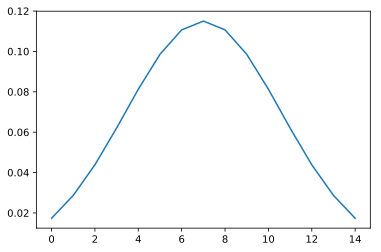

In [7]:
plt.plot(range(len(i_optimal.f)), i_optimal.f)

In [3]:
sigma = 1.2
path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/Sigma_1.2/Trial_0/"


In [4]:
mean_n = compute_mean_n(sigma, path)

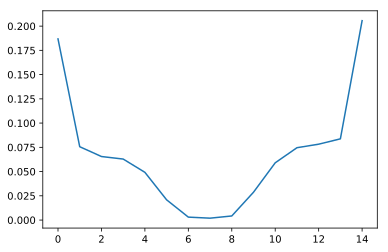

In [5]:
plt.plot(range(len(mean_n)), mean_n)

In [8]:
sigma = 1.2
path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state/Sigma_1.2/"


In [9]:
mean_n_1000 = compute_mean_n(sigma, path)

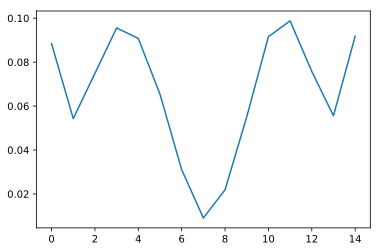

In [10]:
plt.plot(range(len(mean_n)), mean_n_1000)

In [17]:
sigma = 1.2
path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_10000/Sigma_1.2/"


In [12]:
mean_n_10000 = compute_mean_n(sigma, path)

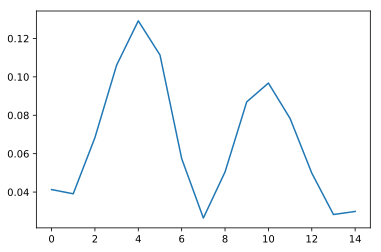

In [13]:
plt.plot(range(len(mean_n)), mean_n_10000)

In [3]:
sigma = 1.2
path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state_50000/Sigma_1.2/"


In [4]:
successful_exit = np.loadtxt(path + "successful_exit")

In [5]:
n1 = np.loadtxt(path + "n1")

In [7]:
n_sum = []
for i in range(1, 16):
    n_sum.append(np.sum(np.loadtxt(path + "n{0}".format(i))))

n_ave = np.array(n_sum)/np.sum(n_sum)

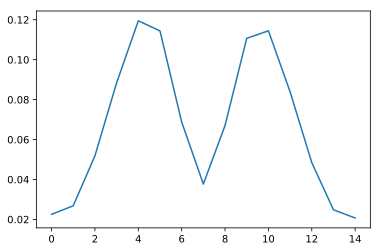

In [13]:
plt.plot(range(len(n_ave)), n_ave)

In [ ]:
mean_n_50000 = compute_mean_n(sigma, path)

[   0. 1194.]
[  1. 373.]
[  2. 871.]
[  3. 565.]
[  4. 572.]
[  5. 410.]
[   6. 1038.]
[  7. 276.]
[  8. 463.]
[   9. 1162.]
[ 10. 431.]
[ 11. 241.]
[ 12. 564.]
[ 13. 493.]
[ 14. 413.]
[ 15. 937.]
[ 16. 477.]
[  17. 1014.]
[ 18. 505.]
[ 19. 477.]
[ 20. 631.]
[ 22. 538.]
[ 23. 655.]
[ 24. 691.]


In [ ]:
plt.plot(range(len(mean_n)), mean_n_50000)

In [264]:
i_optimal = Injection(sigma=1.2, num_odes=16)

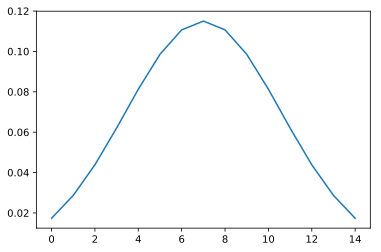

In [266]:
plt.plot(range(len(i_optimal.f)), i_optimal.f)

In [184]:
len(successful_exit)

88

In [191]:
np.array(successful_exit[0], int)

array([  0, 576])

In [193]:
successful_exit[0]

array([  0., 576.])

In [215]:
n_array = []
for entry in successful_exit:
    traj_index, exit_index = np.array(entry, int)
    num_gc_success = np.loadtxt(path + "hashed_traj_{0}".format(traj_index))
    n_array.append(num_gc_success[exit_index][1:])

np_n_array = np.array(n_array)

In [222]:
mean_n = np.mean(np_n_array, axis=0)/np.sum(np.mean(np_n_array, axis=0))

In [223]:
mean_n

array([0.18681818, 0.075625  , 0.06551136, 0.06289773, 0.04920455,
       0.02085227, 0.00301136, 0.00193182, 0.00420455, 0.02869318,
       0.05903409, 0.07460227, 0.07823864, 0.08375   , 0.205625  ])

In [209]:
num_gc_success[exit_index]

array([754.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   7.,
        17.,  26.,  46.,  43.,  59.])

In [ ]:
for 

In [165]:
n_ave = np.loadtxt(path + "n_ave")

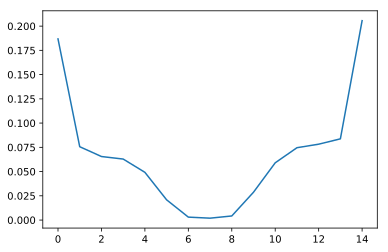

In [171]:
plt.plot(range(len(n_ave)), n_ave/np.sum(n_ave))
# plt.plot(range(len(n_ave)), n_ave)


In [173]:
sigma = 1.2
path = "/nfs/arupclab001/rganti/Optimal_Protocol_bnAbs_arupc_lab001/data/raw/Trials_dr_0.02_muij_0.05_bins_15/steady_state/Sigma_1.2/"
successful_exit = np.loadtxt(path + "successful_exit")

In [174]:
n_ave_1000 = np.loadtxt(path + "n_ave")

In [177]:
n_ave_1000

array([79.57, 48.88, 67.39, 86.01, 81.72, 58.87, 27.97,  8.14, 19.69,
       49.58, 82.42, 88.92, 68.2 , 50.03, 82.61])

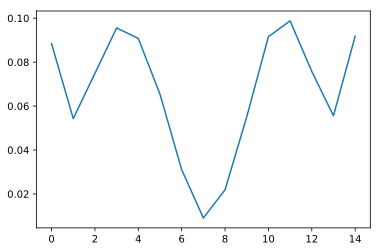

In [176]:
plt.plot(range(len(n_ave_1000)), n_ave_1000/np.sum(n_ave_1000))


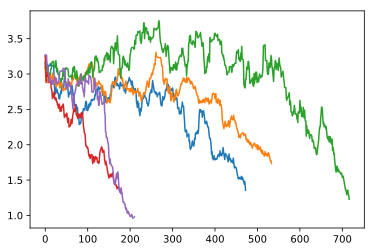

In [141]:
for i in range(5):
    traj_index, exit_index = np.array(successful_exit[i], int)
    num_gc_success = np.loadtxt(path + "hashed_traj_{0}".format(traj_index))
    exit_index = np.where(np.sum(num_gc_success[:, 1:], axis = 1) > 199)[0][0]
    p_gc_success = num_gc_success[:, 1:][:exit_index+1]/np.sum(num_gc_success[:exit_index+1, 1:], axis = 1)[:, np.newaxis]

    i_optimal = Injection(sigma=1.2, num_odes=p_gc_success.shape[1]+1)

    kld_time = []

    for i in range(len(p_gc_success)):
        kld = compute_kl_distance(p_gc_success[i], i_optimal.f)
        kld_time.append(kld)

    plt.plot(range(len(kld_time)), kld_time)

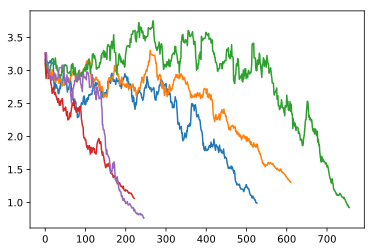

In [142]:
for i in range(5):
    traj_index, exit_index = np.array(successful_exit[i], int)
    num_gc_success = np.loadtxt(path + "hashed_traj_{0}".format(traj_index))
    exit_index = np.where(np.sum(num_gc_success[:, 1:], axis = 1) > 999)[0][0]
    p_gc_success = num_gc_success[:, 1:][:exit_index+1]/np.sum(num_gc_success[:exit_index+1, 1:], axis = 1)[:, np.newaxis]

    i_optimal = Injection(sigma=1.2, num_odes=p_gc_success.shape[1]+1)

    kld_time = []

    for i in range(len(p_gc_success)):
        kld = compute_kl_distance(p_gc_success[i], i_optimal.f)
        kld_time.append(kld)

    plt.plot(range(len(kld_time)), kld_time)

In [139]:
np.sum(num_gc_success[:exit_index+1, 1:], axis = 1)

array([  50.,   50.,   52.,   51.,   50.,   51.,   54.,   56.,   55.,
         52.,   50.,   48.,   47.,   50.,   50.,   50.,   50.,   49.,
         51.,   51.,   49.,   49.,   48.,   47.,   46.,   49.,   45.,
         43.,   41.,   42.,   42.,   41.,   40.,   41.,   41.,   43.,
         43.,   44.,   43.,   44.,   43.,   43.,   43.,   42.,   41.,
         41.,   40.,   39.,   38.,   40.,   37.,   37.,   37.,   36.,
         34.,   34.,   34.,   33.,   33.,   34.,   34.,   36.,   35.,
         36.,   37.,   36.,   36.,   34.,   34.,   35.,   35.,   35.,
         35.,   37.,   37.,   37.,   39.,   39.,   38.,   38.,   37.,
         35.,   35.,   34.,   33.,   33.,   33.,   33.,   34.,   33.,
         33.,   33.,   33.,   33.,   34.,   34.,   36.,   35.,   35.,
         36.,   35.,   33.,   31.,   30.,   30.,   30.,   29.,   27.,
         26.,   25.,   26.,   26.,   26.,   26.,   27.,   28.,   29.,
         29.,   29.,   29.,   30.,   29.,   28.,   27.,   25.,   24.,
         25.,   25.,

In [129]:
len(kld_time)

345

In [71]:
exit_index = np.where(np.sum(num_gc_success[:, 1:], axis = 1) > 199)[0][0]

In [73]:
np.sum(num_gc_success[:exit_index+1, 1:], axis = 1)[:, np.newaxis]

array([[ 50.],
       [ 50.],
       [ 50.],
       [ 50.],
       [ 47.],
       [ 45.],
       [ 45.],
       [ 47.],
       [ 47.],
       [ 47.],
       [ 48.],
       [ 50.],
       [ 48.],
       [ 47.],
       [ 45.],
       [ 45.],
       [ 45.],
       [ 44.],
       [ 44.],
       [ 44.],
       [ 44.],
       [ 42.],
       [ 43.],
       [ 44.],
       [ 44.],
       [ 42.],
       [ 42.],
       [ 41.],
       [ 40.],
       [ 39.],
       [ 39.],
       [ 39.],
       [ 38.],
       [ 38.],
       [ 37.],
       [ 35.],
       [ 34.],
       [ 34.],
       [ 33.],
       [ 34.],
       [ 33.],
       [ 32.],
       [ 33.],
       [ 34.],
       [ 34.],
       [ 32.],
       [ 32.],
       [ 32.],
       [ 32.],
       [ 32.],
       [ 33.],
       [ 34.],
       [ 35.],
       [ 34.],
       [ 33.],
       [ 32.],
       [ 31.],
       [ 31.],
       [ 29.],
       [ 30.],
       [ 29.],
       [ 30.],
       [ 30.],
       [ 29.],
       [ 29.],
       [ 29.],
       [ 2

In [74]:
p_gc_success = num_gc_success[:, 1:][:exit_index+1]/np.sum(num_gc_success[:exit_index+1, 1:], axis = 1)[:, np.newaxis]

In [75]:
p_gc_success.shape

(247, 15)

In [80]:
i_optimal = Injection(sigma=1.2, num_odes=p_gc_success.shape[1]+1)

In [87]:
i_optimal.f

array([0.0173701 , 0.02868269, 0.04384569, 0.0620474 , 0.08128491,
       0.09857933, 0.11067548, 0.11502881, 0.11067548, 0.09857933,
       0.08128491, 0.0620474 , 0.04384569, 0.02868269, 0.0173701 ])

In [93]:
p_gc_success[0]

array([0.36, 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.18, 0.4 ])

In [96]:
kld_time = []
for i in range(len(p_gc_success)):
    kld = compute_kl_distance(p_gc_success[i], i_optimal.f)
    kld_time.append(kld)
    

In [97]:
kld_time

[2.7208553265865865,
 2.6985997612038397,
 2.724020545145322,
 2.724020545145322,
 2.7246308427855226,
 2.708620199971484,
 2.761847044373957,
 2.7768450023209983,
 2.7768450023209983,
 2.882693517812106,
 2.9128323506703953,
 2.829802815325406,
 2.8516815195034275,
 2.9472232584671705,
 2.9397976674599584,
 2.869059631227787,
 2.869059631227787,
 2.8597686598299763,
 2.9020776572245426,
 2.9733407156306493,
 2.9733407156306493,
 2.960971697623874,
 3.0233680517759463,
 3.0260717477463857,
 3.0226555245723024,
 3.0710649617095904,
 3.0710649617095904,
 3.1433004496045043,
 3.2506283353775025,
 3.2359921575528103,
 3.2359921575528103,
 3.2359921575528103,
 3.1175633317148317,
 3.235243544262042,
 3.2308177383223304,
 3.2251477451634827,
 3.220765464819009,
 3.220765464819009,
 3.2170097581940156,
 3.220765464819009,
 3.088457947612807,
 2.994295072536419,
 2.7908637582027387,
 2.803351497439251,
 2.7388085070684935,
 2.7788824654062196,
 2.7103055381372902,
 2.644134833308038,
 2.644134

In [35]:
20./50

0.4

In [30]:
p_gc_success[:, 1:]/np.sum(p_gc_success[:, 1:], axis = 1)[:, np.newaxis]

/home/rganti/.pkg/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/home/rganti/.pkg/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


array([[0.36, 0.06, 0.  , ..., 0.  , 0.18, 0.4 ],
       [0.34, 0.06, 0.  , ..., 0.  , 0.2 , 0.4 ],
       [0.34, 0.06, 0.  , ..., 0.  , 0.18, 0.42],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])